In [ ]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

mtcars = pd.read_csv("10_patient_dataset (3).csv")
del mtcars["Diabetes Test Type"]
del mtcars["Timestamp"]

mtcars

,Patient ID,Glucose level recorded,D-Dimer Test Level,Systolic Blood Pressure (mm Hg),Diastolic Blood Pressure (mm Hg),Body Temperature (°F),Oxygen Level (Spo2),Chest Congestion (%)
0,1000,125.00,0.45,99.0,78,98.0,99,9
1,1001,124.00,0.46,105.0,81,103.0,96,10
2,1002,124.60,0.50,106.0,84,99.0,94,11
3,1003,124.20,0.47,111.0,82,99.7,99,10
4,1004,123.90,0.42,100.0,80,99.8,97,9
5,1005,123.80,0.44,99.6,80,104.0,99,8
6,1006,122.00,0.45,99.1,80,102.0,98,9
7,1007,122.61,0.46,98.0,78,99.0,100,10
8,1008,122.63,0.42,98.0,79,98.7,100,7
9,1009,122.80,0.42,98.0,79,98.0,97,6


In [ ]:
mtcars.mean() 

Patient ID                          1008.000000
Glucose level recorded               123.602353
D-Dimer Test Level                     0.453529
Systolic Blood Pressure (mm Hg)      101.647059
Diastolic Blood Pressure (mm Hg)      80.470588
Body Temperature (°F)                100.376471
Oxygen Level (Spo2)                   97.294118
Chest Congestion (%)                   9.176471
dtype: float64

In [ ]:
mtcars.median()      

Patient ID                          1008.00
Glucose level recorded               123.90
D-Dimer Test Level                     0.45
Systolic Blood Pressure (mm Hg)       99.60
Diastolic Blood Pressure (mm Hg)      80.00
Body Temperature (°F)                 99.70
Oxygen Level (Spo2)                   97.00
Chest Congestion (%)                   9.00
dtype: float64

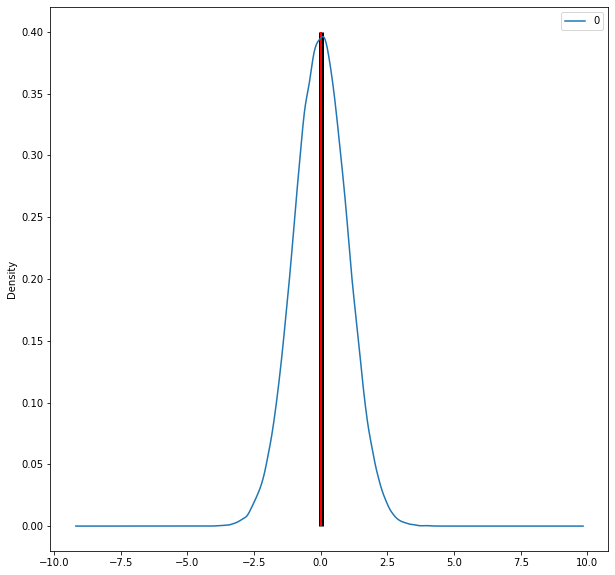

In [ ]:
norm_data = pd.DataFrame(np.random.normal(size=100000))

norm_data.plot(kind="density",
              figsize=(10,10));


plt.vlines(norm_data.mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.4,
           linewidth=5.0);

plt.vlines(norm_data.median(),   # Plot red line at median
           ymin=0, 
           ymax=0.4, 
           linewidth=2.0,
           color="red");

In [ ]:
x = [8.0, 1, 2.5, 4, 28.0]
n = len(x)
mean = sum(x) / n
var = sum((item - mean)**2 for item in x) / (n - 1)
var

123.19999999999999

In [ ]:
std = var ** 0.5
std

11.099549540409285

In [ ]:
skew = (sum((item - mean)**3 for item in x) * n / ((n - 1) * (n - 2) * std**3))
skew

1.9470432273905929

In [ ]:
x = list(range(-10, 11))
y = [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]
x_, y_ = np.array(x), np.array(y)
x__, y__ = pd.Series(x_), pd.Series(y_)
n = len(x)
mean_x, mean_y = sum(x) / n, sum(y) / n
cov_xy = (sum((x[k] - mean_x) * (y[k] - mean_y) for k in range(n)) / (n - 1))
cov_xy

19.95

In [ ]:
var_x = sum((item - mean_x)**2 for item in x) / (n - 1)
var_y = sum((item - mean_y)**2 for item in y) / (n - 1)
std_x, std_y = var_x ** 0.5, var_y ** 0.5
r = cov_xy / (std_x * std_y)
r

0.861950005631606

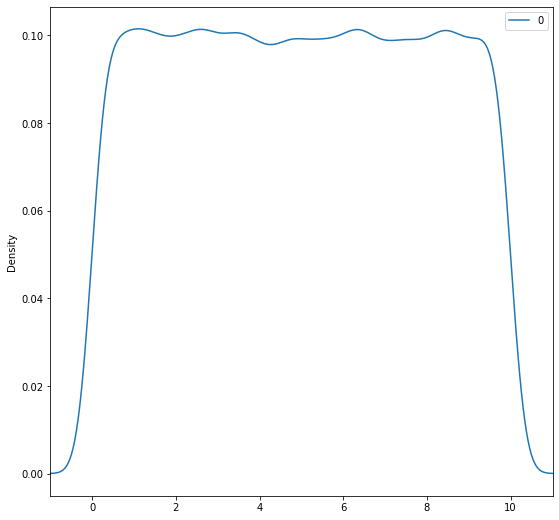

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

uniform_data = stats.uniform.rvs(size=100000,  # Generate 100000 numbers
                                 loc = 0,      # From 0 
                                 scale=10)     # To 10
                        
pd.DataFrame(uniform_data).plot(kind="density",  # Plot the distribution
                               figsize=(9,9),
                               xlim=(-1,11));


0.15865525393145707 0.15865525393145707 0.6826894921370859


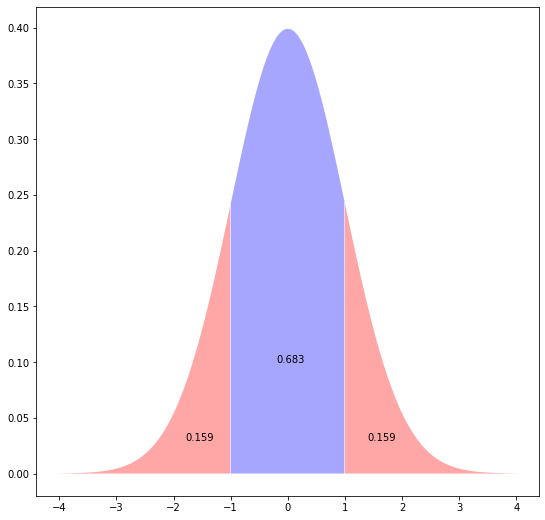

In [ ]:
prob_under_minus1 = stats.norm.cdf(x= -1,  
                                loc = 0,               
                                scale= 1)     

prob_over_1 = 1 - stats.norm.cdf(x= 1,  
                                loc = 0,               
                                scale= 1) 

between_prob = 1-(prob_under_minus1+prob_over_1)

print(prob_under_minus1, prob_over_1, between_prob)

plt.rcParams["figure.figsize"] = (9,9)
                                  
plt.fill_between(x=np.arange(-4,-1,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-1,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,4,0.01), 
                 y1= stats.norm.pdf(np.arange(1,4,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-1,1,0.01), 
                 y1= stats.norm.pdf(np.arange(-1,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.text(x=-1.8, y=0.03, s= round(prob_under_minus1,3))
plt.text(x=-0.2, y=0.1, s= round(between_prob,3))
plt.text(x=1.4, y=0.03, s= round(prob_over_1,3));

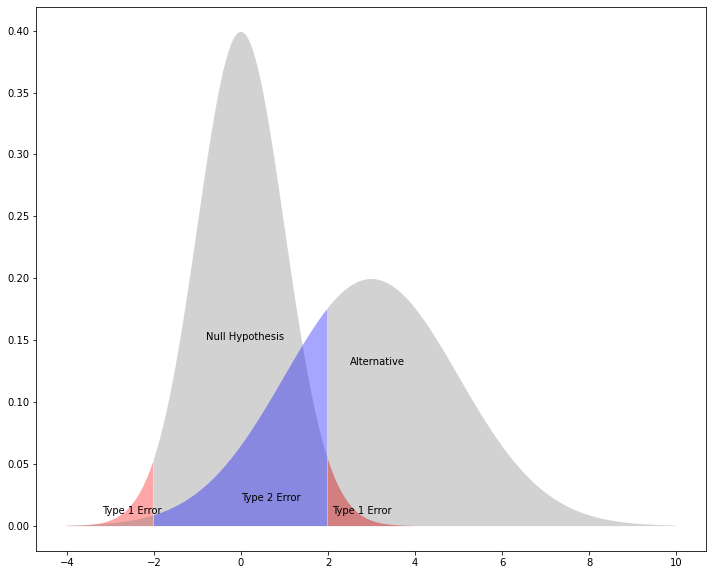

In [ ]:
plt.figure(figsize=(12,10))


plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01)) ,
                 facecolor='grey',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,4,0.01), 
                 y1= stats.norm.pdf(np.arange(2,4,0.01)) ,
                 facecolor='red',
                 alpha=0.5)

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01),loc=3, scale=2) ,
                 facecolor='grey',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01),loc=3, scale=2) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,10,0.01), 
                 y1= stats.norm.pdf(np.arange(2,10,0.01),loc=3, scale=2),
                 facecolor='grey',
                 alpha=0.35)

plt.text(x=-0.8, y=0.15, s= "Null Hypothesis")
plt.text(x=2.5, y=0.13, s= "Alternative")
plt.text(x=2.1, y=0.01, s= "Type 1 Error")
plt.text(x=-3.2, y=0.01, s= "Type 1 Error")
plt.text(x=0, y=0.02, s= "Type 2 Error");

In [ ]:
lower_quantile = stats.norm.ppf(0.025)  # Lower cutoff value
upper_quantile = stats.norm.ppf(0.975)  # Upper cutoff value

# Area under alternative, to the left the lower cutoff value
low = stats.norm.cdf(lower_quantile,    
                     loc=3,             
                     scale=2)

# Area under alternative, to the left the upper cutoff value
high = stats.norm.cdf(upper_quantile, 
                      loc=3, 
                      scale=2)          

# Area under the alternative, between the cutoffs (Type II error)
high-low

0.294956061112323